# Guía 2 ejercicio 20

## Samantha Kucher

# a)

Un experimento aleatorio es aquel que si lo repito bajo las mismas condiciones iniciales, da distinto. Un experimento de Bernoulli es un experimento aleatorio que tiene dos posibles resultados: éxito o fracaso.   
   
El objetivo de este programa es simular un experimento de Bernoulli, con una dada cantidad de intentos y cierta probabilidad de tener éxito.

In [255]:
import numpy as np
import math as m
import random as rd
from scipy.stats import binom, poisson
from matplotlib import pyplot as plt
from datetime import datetime
rd.seed(datetime.now())
%matplotlib inline

Genero M números aleatorios con distribución uniforme en [0,1). Por cada número, si es menor a una probabilidad prefijada, significa que tuve un éxito (si no, un fracaso). Al final del experimento, cuento la cantidad de éxitos y de fracasos obtenidos.

In [256]:
exitos_vector=[] #vectores para guardar la cantidad de éxitos y fracasos de cada experimento
fracasos_vector=[]

In [257]:
def expbernoulli(prob,M): #M = cantidad de intentos = cantidad de numeros aleatorios por experimento
    exitos = 0
    fracasos = 0
    for n in range(0,M):
        num = rd.random()
        if num<prob:
            exitos = exitos+1 #cantidad de numeros abajo de prob
        else:
            fracasos = fracasos+1 #cantidad de numeros arriba de prob
    exitos_vector.append(exitos) #voy juntando la cantidad de numeros que salen abajo de p en cada experimento
    fracasos_vector.append(fracasos)
    return exitos_vector

Puedo repetir el experimento T veces. Los resultados de cada repetición los guardo en `exitos_vector` y `fracasos_vector`. Por ejemplo, T=1000, obtengo lo siguiente:

In [258]:
T =1000 #repeticiones del experimento
for i in range(0,T):    
    a = expbernoulli(0.6,100)

print('En promedio, se obtuvieron {} éxitos y {} fracasos.').format(round(np.mean(exitos_vector),0), round(np.mean(fracasos_vector)),0)

En promedio, se obtuvieron 60.0 éxitos y 40.0 fracasos.


Se observa claramente que la cantidad de éxitos obtenida es `M*prob`. Es decir, la probabilidad de que el generador entregue un número en [0,`prob`) es `prob` (por lo tanto, la probabilidad de qu enetregue uno en [`prob`,1) es 1-`prob`).

In [259]:
exitos_vector=[] #vacio los vectores
fracasos_vector=[]

# b)

Ahora inciden 15 fotones sobre un detector con eficiencia 0.75. Es decir, `M=15` y `prob=0.75`, y el experimento se repite 1000 veces.

In [260]:
T = 1000 #repeticiones del experimento
for i in range(0,T):    
    b = expbernoulli(0.75,15)

Como se realizó un experimento de Bernoulli en el cual la variable aleatoria es la cantidad de éxitos y la probabilidad de tener éxito es constante, la distribución que corresponde a esta variable aleatoria es la binomial.

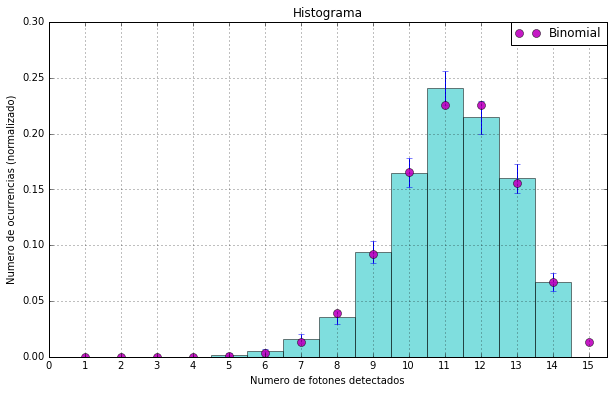

In [261]:
puntosb = np.arange(1,16,1) #puntos para graficar la distribución
binesb = np.arange(0.5,15.5)
numerob, binsb = np.histogram(b, bins = binesb) 
errorb = np.sqrt(numerob) / (np.diff(binsb)* np.sum(numerob)) #error poissoniano-->NOOOOO BINOMIAL!!!!
numerob = numerob / (np.diff(binsb) * np.sum(numerob)) #Normalizo a 1

fig = plt.figure(figsize=(10,6))
plt.bar(binsb[:-1], numerob, width = np.diff(binsb), yerr = errorb, ecolor="b", color='c', alpha=0.5)
plt.plot(puntosb,binom.pmf(puntosb, 15,0.75), 'mo', ms=8, label='Binomial', alpha=0.9)
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([0,15.5])
plt.xticks(range(0,16))
plt.xlabel('Numero de fotones detectados')
plt.ylabel('Numero de ocurrencias (normalizado)')
plt.title('Histograma')
plt.grid()
plt.show()

In [262]:
exitos_vector=[] #vacio los vectores
fracasos_vector=[]

# c)

Una fuente emite fotones con una intensidad media $I=15 \ \text{fot} \ s^{-1}$. Con el objetivo de simular la emisión de fotones durante un $\Delta t = 1 \ \text{s}$, se dividió este tiempo en 1000 intervalos iguales $dt$. La probabilidad de que un fotón sea emitido en $dt$ puede aproximarse por $I dt$ (es decir, `prob = 15/1000`).   
   
Considero la variable aleatoria "cantidad de fotones emitidos en un $dt$  si intento 1000 veces con una probabilidad 15/1000".

## Pensar explicación

In [263]:
T = 1000 #repeticiones del experimento
for i in range(0,T):    
    c = expbernoulli(15.00/1000.00,1000)

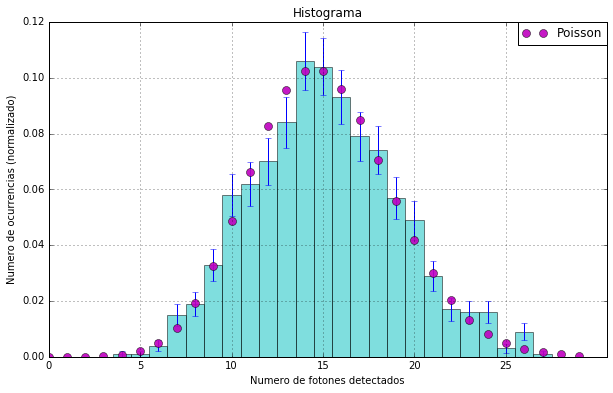

In [264]:
puntosc = np.arange(0,30) #puntos para graficar la distribución
binesc = np.arange(0.5,30.5)
numeroc, binsc = np.histogram(c, bins = binesc) 
errorc = np.sqrt(numeroc) / (np.diff(binsc)* np.sum(numeroc)) #error poissoniano ¿o binomial?
numeroc = numeroc / (np.diff(binsc) * np.sum(numeroc)) #Normalizo a 1

fig = plt.figure(figsize=(10,6))
plt.bar(binsc[:-1], numeroc, width = np.diff(binsc), yerr = errorc, ecolor="b", color='c', alpha=0.5)
plt.plot(puntosc,poisson.pmf(puntosc, 15), 'mo', ms=8, label='Poisson', alpha=0.9)
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([0,30.5])
plt.xticks(range(0,30,5))
plt.xlabel('Numero de fotones detectados')
plt.ylabel('Numero de ocurrencias (normalizado)')
plt.title('Histograma')
plt.grid()
plt.show()